In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("results.csv", header=None).values
concepts = ['2', '16', '32', '64']
modalities = ['1', '2', '3', '4', '5']
fusions = ['Late Fusion', 'Early Fusion', 'Low Rank Fusion', 'Tensor Fusion']
perf_m = []
for (i, modality) in enumerate(modalities):
    perf_m.append(df[4*i:4*(i+1)])
perf_m = np.array(perf_m)
perf_c = []
for (i, concept) in enumerate(concepts):
    perf_c.append(df[[4*j+i for j in range(len(modalities))]])
perf_c = np.array(perf_c)

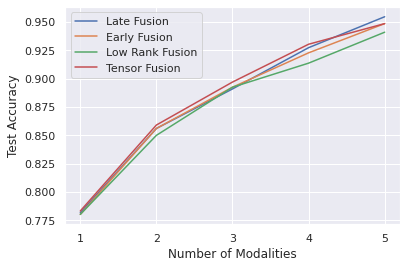

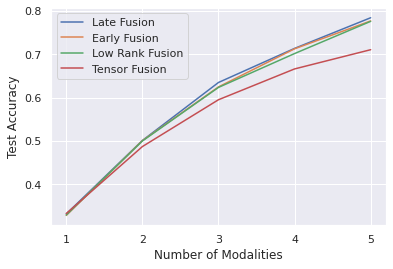

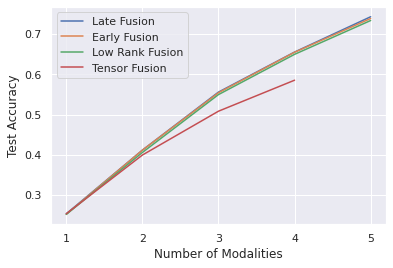

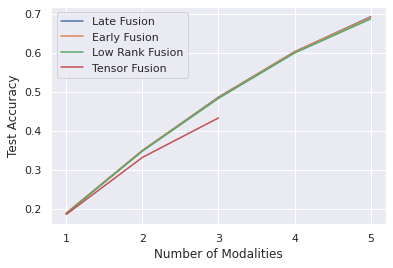

<Figure size 432x288 with 0 Axes>

In [25]:
for k in range(len(concepts)):
    df_m = pd.DataFrame(perf_m[:,k,:], index=modalities, columns=fusions)
    df_m = df_m.reset_index().melt(id_vars='index', value_name='val', var_name='type')
    df_m = df_m.rename(columns={'index':'Number of Modalities', 'val':'Test Accuracy', 'type':''})
    fig = sns.lineplot(df_m, x='Number of Modalities', y='Test Accuracy', hue='').figure
    plt.show()
    fig.savefig('modality_perf{}.png'.format(concepts[k]))
    plt.clf()

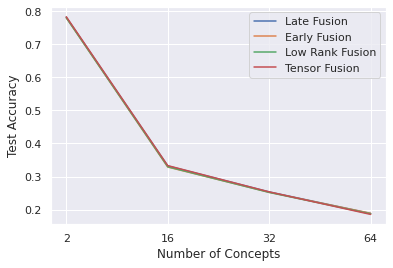

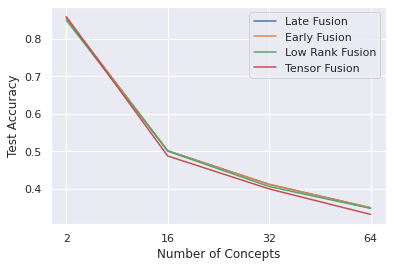

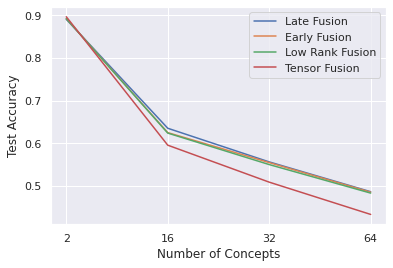

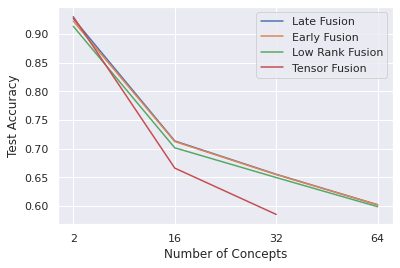

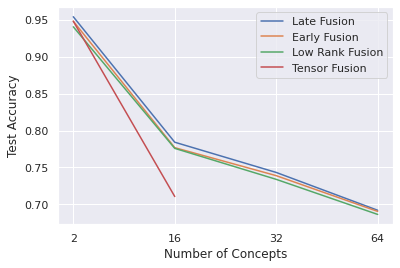

<Figure size 432x288 with 0 Axes>

In [26]:
for k in range(len(modalities)):
    df_m = pd.DataFrame(perf_c[:,k,:], index=concepts, columns=fusions)
    df_m = df_m.reset_index().melt(id_vars='index', value_name='val', var_name='type')
    df_m = df_m.rename(columns={'index':'Number of Concepts', 'val':'Test Accuracy', 'type':''})
    fig = sns.lineplot(df_m, x='Number of Concepts', y='Test Accuracy', hue='').figure
    plt.show()
    fig.savefig('concepts_perf{}.pdf'.format(modalities[k]))
    plt.clf()

In [20]:
import pickle
import numpy as np
with open("/usr0/home/yuncheng/MultiBench/synthetic/DATA_synergy_xor.pickle", 'rb') as f:
    file = pickle.load(f)
file.keys()

dict_keys(['train', 'valid1', 'valid2', 'test'])

In [8]:
import pickle
import numpy as np
with open("/usr0/home/yuncheng/MultiBench/synthetic/DATA_redundancy.pickle", 'rb') as f:
    redundancy = pickle.load(f)
with open("/usr0/home/yuncheng/MultiBench/synthetic/DATA_uniqueness0.pickle", 'rb') as f:
    uniqueness0 = pickle.load(f)
with open("/usr0/home/yuncheng/MultiBench/synthetic/DATA_uniqueness1.pickle", 'rb') as f:
    uniqueness1 = pickle.load(f)
with open("/usr0/home/yuncheng/MultiBench/synthetic/DATA_synergy_xor.pickle", 'rb') as f:
    synergy = pickle.load(f)
data_list = [redundancy, uniqueness0, uniqueness1, synergy]
data = dict()
data['train'] = dict()
for f in data_list[0]['train']:
    for dat in data_list:
        d = data['train'].get(f, [])
        d.append(dat['train'][f][:int(0.1*len(dat['train'][f]))])
        data['train'][f] = d
    data['train'][f] = np.concatenate(data['train'][f])

In [18]:
N = data['train']['0'].shape[0]
random_split = np.random.shuffle(np.arange(N))

In [19]:
for i in range(4):
    random_data = dict()
    random_data['train'] = dict()
    for f in data['train']:
        random_data['train'][f] = data['train'][f][i*N//4:(i+1)*N//4]
    with open("/usr0/home/yuncheng/MultiBench/synthetic/DATA_random{}.pickle".format(i), 'wb') as f:
        pickle.dump(random_data, f)

In [11]:
N

5800